Что делать

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 3 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

для выполнения задания мы используем датасет IMDB

In [189]:
import pandas as pd
import seaborn as sns
import json
from pylab import rcParams
rcParams['figure.figsize'] = 6,3

%pylab inline
%config InlineBackend.figure_format = 'svg' 

import warnings
warnings.simplefilter('ignore')

from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Populating the interactive namespace from numpy and matplotlib


In [267]:
movies = pd.read_csv('tmdb_5000_movies.csv', sep=',')

Matplotlib

In [269]:
leftover = ['budget', 'genres','original_language', 
               'popularity', 'revenue', 'runtime',
               'title', 'vote_average', 'vote_count']
mov = movies[leftover]

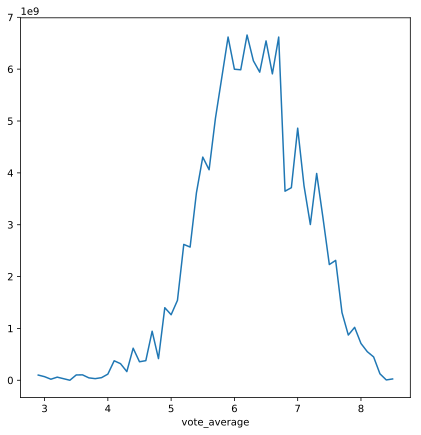

In [271]:
# взаимосвязь между количеством оценок и средней оценкой фильма

mov5 = mov.sort_values(['vote_average'], ascending=True)
mov5 = mov5[mov5['vote_count'] >= 100] #уберем фильмы с малым кол-ом оценок
mov5 = mov5.groupby('vote_average').sum()
mov5 = mov5['budget']
mov5.plot(figsize = (7,7))

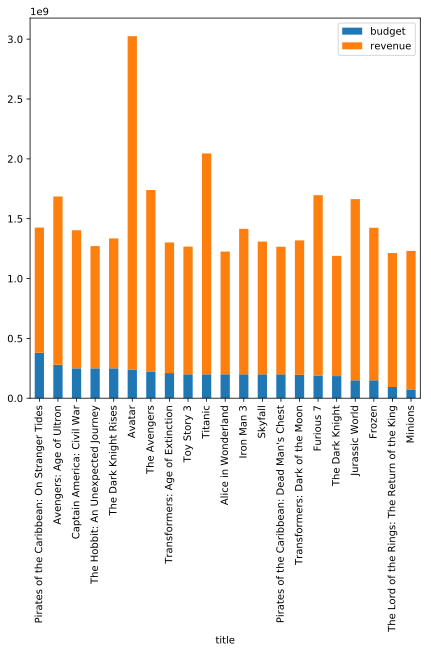

In [272]:
# взаимосвязь между бюджетом и коссовыми сборами фильмов

mov3 = mov.sort_values(['budget'], ascending=False)
mov3 = mov3[mov3['revenue'] >= 1e9] #оставим только самые кассовые фильмы
mov3 = mov3[[x for x in mov3.columns if x in ['title','revenue','budget']]]
mov3.plot(kind='bar', rot=90, stacked=True, x = 'title',figsize = (7,7))
#mov3.set_title('Critic Score distribution')

Seaborn

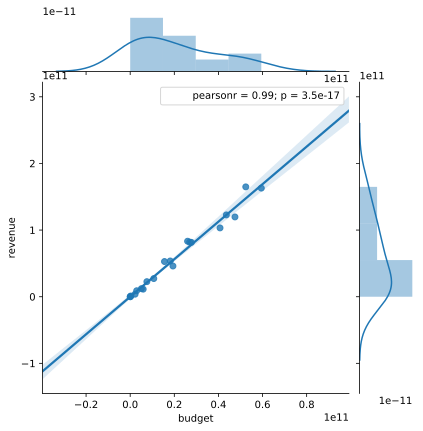

In [273]:
sns.jointplot(x='budget', y='revenue', 
              data=mov21, kind='reg');

Plotly

In [274]:
#создадим таблицу со сводными данными по жанрам
def genres_to_set(movies):
    mov_by_genre = []
    for index, row in movies.iterrows():
        for genre_data in json.loads(row['genres']):
            row_clone = row.copy(deep=False)
            row_clone['genre'] = genre_data['name']
            mov_by_genre.append(row_clone)

    return pd.DataFrame(mov_by_genre)

mov_by_genre = genres_to_set(movies)

mov21 = mov_by_genre.sort_values(['genre']).groupby('genre').sum()    
mov21  

,budget,id,popularity,revenue,runtime,vote_average,vote_count
genre,,,,,,,
Action,59443406599,57800592,35705.201005,162959914515,127568.0,6911.9,1310730
Adventure,52398220463,34675110,31021.753173,164841561551,87953.0,4864.0,1130229
Animation,15553021056,13741536,9082.344799,52812167865,21042.0,1483.9,291604
Comedy,43589711809,82104325,31376.563703,122760517608,172252.0,10238.3,904362
Crime,19383466474,32525368,15905.878941,46040860686,76328.0,4366.8,523809
Documentary,291861725,9907509,434.029619,1082277678,10226.0,686.2,7765
Drama,47498112157,127655495,40805.868195,119710983984,260171.0,14674.6,1222649
Family,26019109625,24383755,14278.251492,83283238689,49914.0,3093.2,462875
Fantasy,26949696595,16838210,15428.106402,81982199925,45486.0,2585.0,561369


In [204]:
trace0 = go.Scatter(
    x=mov21.index,
    y=mov21.budget,
    name='total budgets'
)

trace1 = go.Scatter(
    x=mov21.index,
    y=mov21.revenue,
    name='total revenue'
)

data = [trace0, trace1]
layout = {'title': 'films by genres'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [278]:
trace0 = go.Scatter(
    x=mov21.revenue,
    y=mov21.budget,
    mode = 'markers+text',
    text = mov21.index,
    #textposition='bottom',
    marker = dict(
        size = mov21.budget/1e9,
        color = [
            'aqua', 'azure', 'beige', 'lightgreen',
            'lavender', 'lightblue', 'pink', 'salmon',
            'wheat', 'ivory', 'silver', 'red', 'blue', 'orange', 'green', 'yellow', 'grey', 'indigo', 'purple'
        ]
    )
)

data = [trace0]
layout = {
    'title': 'revenue & budgets by film genres',
    'xaxis': {'title': 'revenue'},
    'yaxis': {'title': 'budget'}
}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)